**Comparative Analysis of Linear Regression Techniques on Diabetes Dataset**

This analysis explores linear regression techniques on the diabetes dataset. It compares results from gradient descent, direct solution, and sklearn's LinearRegression, extending to polynomial regression to examine nonlinear relationships. Model performance is evaluated using R² scores, empirical loss, and visualizations.

No missing values
Empirical Loss: 4711.283483623049
R2 Score (Test Data): 0.1107684892298274


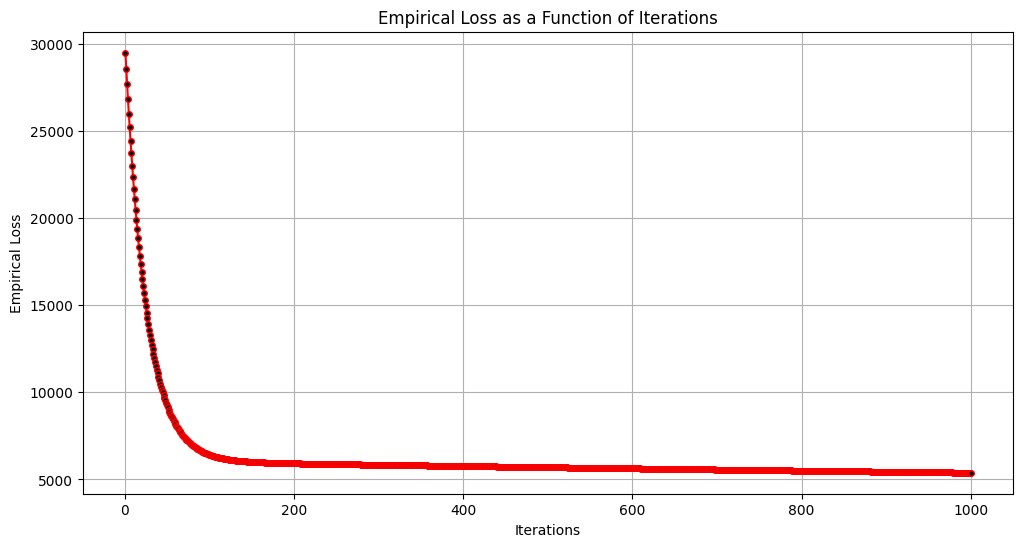

Empirical Loss (Test Data): 4712.924776122811
R2 Score (Direct Solution - Test Data): 0.4526027629719198
R2 Score (Gradient Descent - Test Data): 0.11082403727042178


In [ ]:
from numpy.core.fromnumeric import partition
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

diabetes = load_diabetes()


X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=["target"])

missing_values = X.isnull().sum().sum()
if missing_values == 0:
    print("No missing values")
else:
    print(f"({missing_values} missing values).")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


class LinearRegressionGradientDescent:
    def __init__(self, learning_rate=0.01, include_bias=True):
        self.learning_rate = learning_rate
        self.include_bias = include_bias
        self.weights = None
        self.loss_history = []

    def fit(self, X, y, num_iterations=1000):
        m, n = X.shape
        if self.include_bias:
            X = np.c_[np.ones((m, 1)), X]

        self.weights = np.random.rand(X.shape[1])

        for _ in range(num_iterations):
            y_pred = X.dot(self.weights)
            error = y_pred - y.values.flatten()
            gradient = 2 / m * X.T.dot(error)
            self.weights -= self.learning_rate * gradient
            loss = np.mean((error ** 2))
            self.loss_history.append(loss)

    def predict(self, X):
        if self.include_bias:
            y = np.ones((X.shape[0], 1))
            X = np.c_[y, X]
        return X.dot(self.weights)


    def evaluate(self, X, y):
        y_pred = self.predict(X)
        r2 = r2_score(y, y_pred)
        return r2

    def direct_solution(self, X, y):
        if self.include_bias:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)


model = LinearRegressionGradientDescent(learning_rate=0.01, include_bias=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Empirical Loss:", np.mean((y_pred - y_test.values.flatten()) ** 2))

r2 = model.evaluate(X_test, y_test)
print("R2 Score (Test Data):", r2)


model = LinearRegressionGradientDescent(learning_rate=0.01, include_bias=True)
model.fit(X_train, y_train)
loss_history = model.loss_history

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', markersize=4, markerfacecolor="black", linestyle='-', color='r')
plt.title('Empirical Loss as a Function of Iterations')
plt.xlabel('Iterations')
plt.ylabel('Empirical Loss')
plt.grid(True)
plt.show()

# Evaluate the model on the test data
y_pred = model.predict(X_test)
test_loss = np.mean((y_pred - y_test.values.flatten()) ** 2)
print("Empirical Loss (Test Data):", test_loss)

direct_model = LinearRegressionGradientDescent() #f part
direct_model.direct_solution(X_train, y_train)
direct_y_pred = direct_model.predict(X_test)
direct_r2 = r2_score(y_test, direct_y_pred)
print("R2 Score (Direct Solution):", direct_r2)

gradient_descent_model = LinearRegressionGradientDescent(learning_rate=0.01, include_bias=True) #g part
gradient_descent_model.fit(X_train, y_train, num_iterations=1000)
gd_y_pred = gradient_descent_model.predict(X_test)
gd_r2 = r2_score(y_test, gd_y_pred)
print("R2 Score (Gradient Descent):", gd_r2)




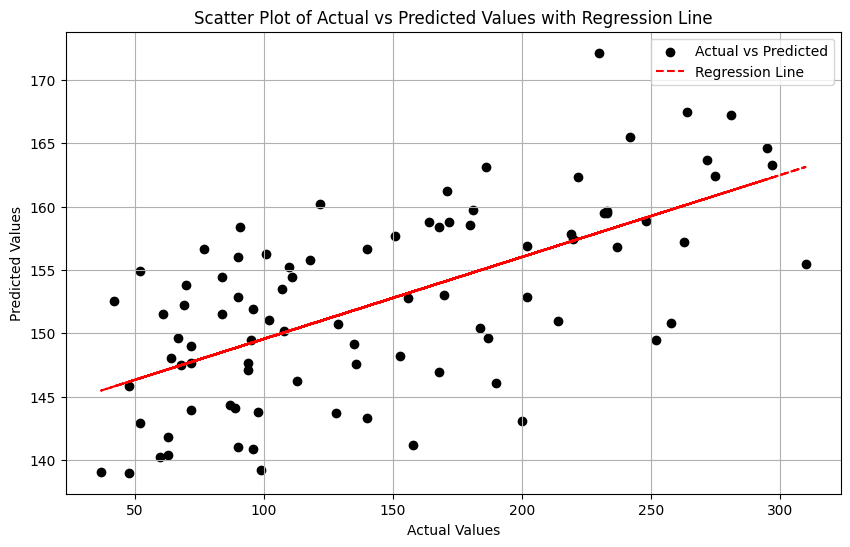

R2 Score (Sklearn Model): 0.4526027629719195


In [ ]:

coefficients = np.polyfit(y_test.values.flatten(), y_pred, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Creating a regression line
regression_line = slope * y_test.values.flatten() + intercept

# Plot the scatter plot of actual vs predicted values and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted', color="black")
plt.plot(y_test, regression_line, color='red', linestyle='--', label=f'Regression Line')
plt.title('Scatter Plot of Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Using sklearn's LinearRegression for comparison
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
sklearn_y_pred = sklearn_model.predict(X_test)
sklearn_r2 = r2_score(y_test, sklearn_y_pred)
print("R2 Score (Sklearn Model):", sklearn_r2)

R2 Score (Polynomial Regression - Degree 2): 0.41563993364080354


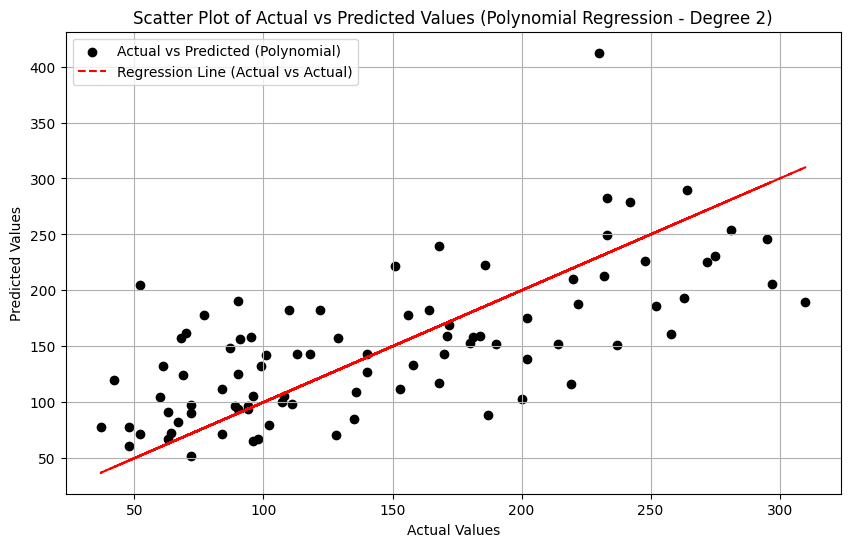

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

polyreg.fit(X_train, y_train)

# Predict using the polynomial regression model
y_pred_poly = polyreg.predict(X_test)

# Calculating the R2 score
poly_r2 = r2_score(y_test, y_pred_poly)
print(f"R2 Score (Polynomial Regression - Degree {degree}):", poly_r2)

# Scatter plot actual vs. predicted values for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, label='Actual vs Predicted (Polynomial)', color="black")
plt.plot(y_test, y_test, color='red', linestyle='--', label=f'Regression Line (Actual vs Actual)')
plt.title(f'Scatter Plot of Actual vs Predicted Values (Polynomial Regression - Degree {degree})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()